# Importing Dataset & Libraries : 

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

In [19]:
pokedex = pd.read_csv('C:\\Users\\Kick Buttowski\\Documents\\College work\\Co-Curricular\\Projects\\Pokemon.csv')
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


# Cleaning the Dataset:

Removing NULL values: 
- NULL values arise only on type2 column for pokemon with no more than one type.
- We can correct this by simply making type 2 value the same as type 1.

In [20]:
pokedex.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [21]:
pokedex['Type 2'].fillna(pokedex['Type 1'],inplace = True)
pokedex.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

In [22]:
pokedex.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


Correcting names:
- Take a look at row 3 above. VenasaurMega Venasaur needs to be changed to simply Mega Venasaur.
- This can be done by simply deleting everything before Mega and leaving the rest of the string as it is.

In [23]:
pokedex.Name = pokedex.Name.str.replace(".*(?=Mega)","")
pokedex.head()

C:\Users\Kick Buttowski\AppData\Local\Temp\ipykernel_16364\3269334162.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  pokedex.Name = pokedex.Name.str.replace(".*(?=Mega)","")


,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False


In [24]:
pokedex.set_index("#", inplace = True)
pokedex

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
719,Mega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True


# Data Visualization:

Visualizing Pokemon types : 
- If we consider primary or secondary typing only then our visualization and calculations will be improper.
- So we combine Type 1 & Type 2 to get the exact values of the number of pokemon belonging to a particular type.

In [25]:
count = pokedex['Type 1'].value_counts() + pokedex['Type 2'].value_counts()
count

Bug          89
Dark         61
Dragon       61
Electric     77
Fairy        55
Fighting     73
Fire         92
Flying      103
Ghost        56
Grass       128
Ground       80
Ice          51
Normal      163
Poison       77
Psychic     128
Rock         67
Steel        54
Water       185
dtype: int64

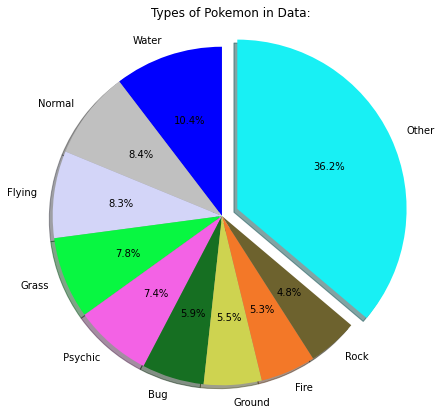

In [26]:
labels = 'Water', 'Normal', 'Flying', 'Grass', ' Psychic', 'Bug', 'Ground', 'Fire', 'Rock', 'Other' 

sizes = [126, 102, 101, 95, 90, 72, 67, 64, 58, 439] 
colors = ['blue','silver','#D3D5F8','#08F741','#F362E5', '#166F22' , '#CED350', '#F37828','#6D622E','#18F0F4']  
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0.1)
 
plt.pie(sizes, explode = explode,labels = labels,colors = colors,autopct = '%1.1f%%',shadow = True, startangle = 90)
plt.axis('equal')
plt.title("Types of Pokemon in Data:")

plt.plot()

fig = plt.gcf()
fig .set_size_inches(7,7)
plt.show()

Visualizing Legendary Pokemon:
- Now we count Legndary pokemon present in the data
- Also we count number of psuedo-Legendary pokemon(Pokemon with stats >= 600,but aren't classified as legendary)
- Then we count total number of Non-Legendary pokemon
- Finally draw a bar chart to visualize the presence of the above three types in the dataset.

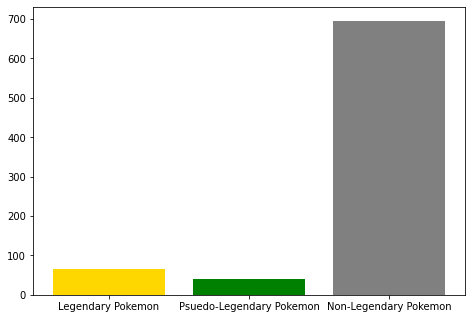

In [27]:
NonLeg = (pokedex['Legendary'] == False).sum()
Leg = (pokedex['Legendary'] == True).sum()

psuedo = ((pokedex['Total'] >= 600)&(pokedex['Legendary'] == False)).sum()
NonLeg = NonLeg - psuedo

values = [Leg,psuedo,NonLeg]
labels = ['Legendary Pokemon','Psuedo-Legendary Pokemon','Non-Legendary Pokemon']

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
c = ['#FFD700','green','grey']
ax.bar(labels,values,color =c) 
plt.show()


Getting a better look by Comparing Legendary and psuedos only:

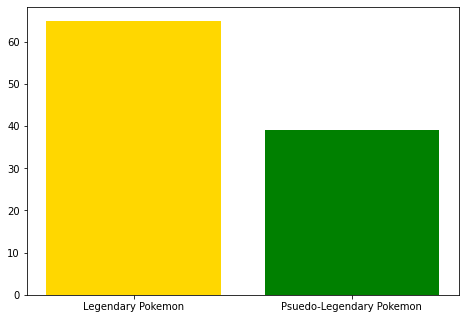

In [28]:
values = [Leg,psuedo]
labels = ['Legendary Pokemon','Psuedo-Legendary Pokemon']
s= ['#FFD700','green']
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(labels,values,color = s)
plt.show()

Visualizing Pokemon Types By Generations:
- First Visualize using Type 1 then Type 2
- Making Use of Swarm Plots

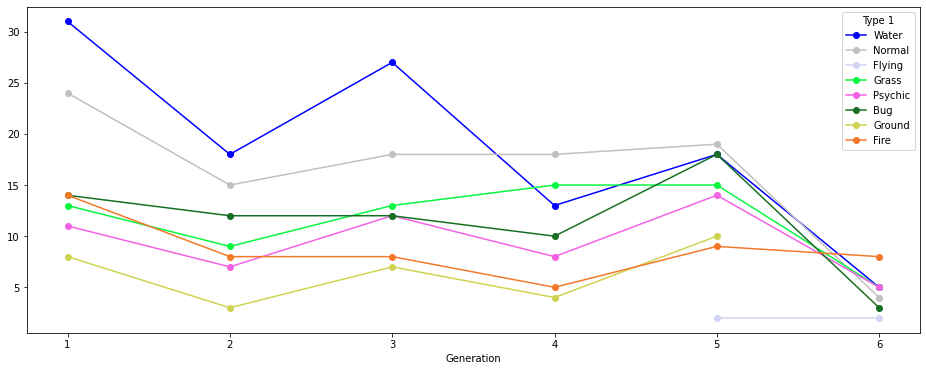

In [29]:
gp = pokedex.groupby(['Generation','Type 1']).count().reset_index()
gp = gp[['Generation','Type 1','Total']]
gp = gp.pivot('Generation','Type 1','Total')
gp[['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Ground', 'Fire']].plot(color=['blue','silver','#D3D5F8','#08F741','#F362E5', '#166F22' , '#CED350', '#F37828'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

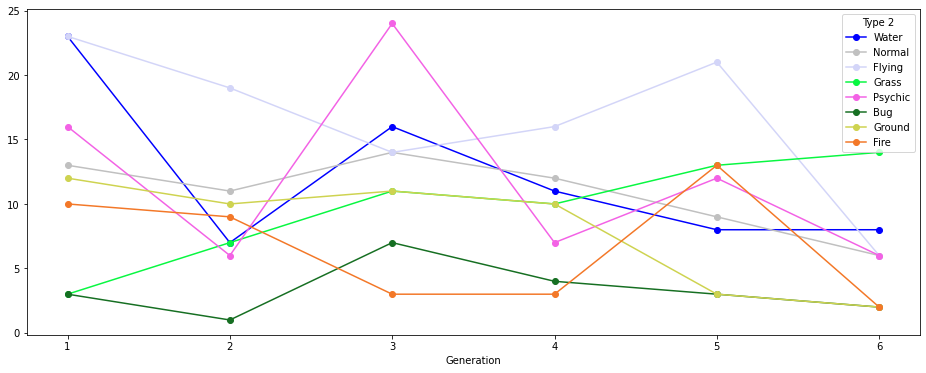

In [30]:
gp = pokedex.groupby(['Generation','Type 2']).count().reset_index()
gp = gp[['Generation','Type 2','Total']]
gp = gp.pivot('Generation','Type 2','Total')
gp[['Water', 'Normal', 'Flying', 'Grass', 'Psychic', 'Bug', 'Ground', 'Fire']].plot(color=['blue','silver','#D3D5F8','#08F741','#F362E5', '#166F22' , '#CED350', '#F37828'],marker='o')
fig=plt.gcf()
fig.set_size_inches(16,6)
plt.show()

Visualizing Individual Pokemon:
- We ask the user to enter two specific pokemon names to be compared and to visualized.
- We make use of radar charts to keep up the originality of a pokedex.

In [31]:
pokedex.head(10)

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,Mega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,Fire,309,39,52,43,60,50,65,1,False
5,Charmeleon,Fire,Fire,405,58,64,58,80,65,80,1,False
6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
6,Mega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
6,Mega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False


In [32]:
Testframe = pokedex[['Name','Type 1','Type 2','HP','Attack','Defense','Sp. Atk','Sp. Def','Speed','Legendary','Total']].copy()
Testframe = Testframe.set_index('Name')

pokemon1 = input("Enter the First Pokemon")
pokemon2 = input("Enter the Second Pokemon")

Enter the First PokemonBlastoise
Enter the Second PokemonVenipede


In [33]:
Testframe.loc[pokemon1]
def ColorAssign(type):
    switcher = {
        "Grass" : "green",
        "Water" : "blue",
        "Fire" : "red",
        "Normal" : "silver",
        "Flying" : "#D3D5F8",
        "Psychic" : "#F362E5",
        "Bug" : '#166F22',
        "Ground" : '#F0CA42',
        "Rock" : '#CDBD72',
        "Steel" : '#C3C1D7',
        "Ghost" : '#7673DA',
        "Dark" : '#8E6856',
        "Dragon" : '#8B76FF',
        "Fighting" : '#A35449',
        "Ice" : '#66EBFF',
        "Fairy" : '#F9AEFE',
        "Electric" : "#F8E64E",
        "Poison" : '#AD5CA2',
    }
    return switcher.get(type,"#ffbf80")

color1 = ""
color2 = ""

p1t1 = Testframe.loc[pokemon1,"Type 1"]
p1t2 = Testframe.loc[pokemon1,"Type 2"]

p2t1 = Testframe.loc[pokemon2,"Type 1"]
p2t2 = Testframe.loc[pokemon2,"Type 2"]

if(p1t1 == p2t1):
    if(p1t2 == p2t2):
        color1 = ColorAssign(p1t1)
        color2 = ColorAssign(p2t2)
    else:
        color1 = ColorAssign(p1t2)
        color2 = ColorAssign(p2t2)
    
else:
    color1 = ColorAssign(p1t1)
    color2 = ColorAssign(p2t1)


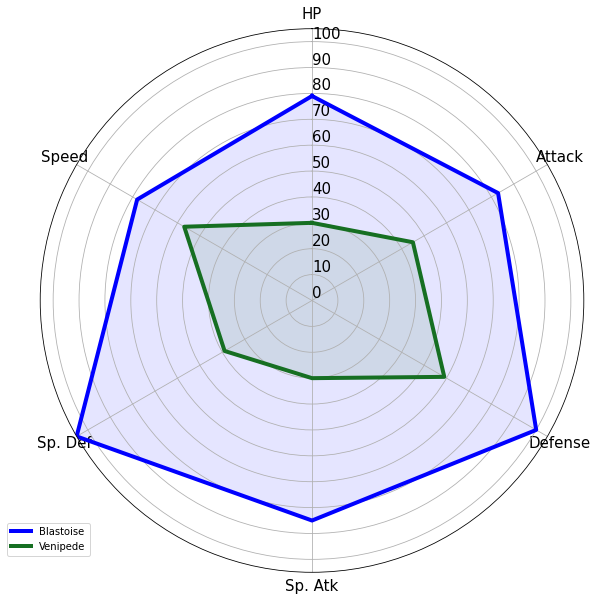

In [34]:
pok1=Testframe.loc[pokemon1]
pok2=Testframe.loc[pokemon2]

from math import pi
fig = plt.figure(figsize=(10, 10))

df = pd.DataFrame({
'group': ['A','B'],
'HP': [pok1["HP"], pok2["HP"]],
'Attack': [pok1["Attack"], pok2["Attack"]],
'Defense': [pok1["Defense"], pok2["Defense"]],
'Sp. Atk': [pok1["Sp. Atk"], pok2["Sp. Atk"]],
'Sp. Def': [pok1["Sp. Def"], pok2["Sp. Def"]],
'Speed': [pok1["Speed"], pok2["Speed"]]
})

maximum=max([pok1["Attack"], pok2["Attack"],pok1["Defense"], pok2["Defense"],pok1["Sp. Atk"], pok2["Sp. Atk"],
pok1["Sp. Def"], pok2["Sp. Def"],pok1["Speed"], pok2["Speed"]])
 

categories=['HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed']
N = len(categories)

aa=[]
aaa=[]
for i in range(maximum):
    aa.append(i*10)
    aaa.append(str(i*10))


angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]
 

ax = plt.subplot(111, polar=True)
 
ax.set_theta_offset(pi / 2)
ax.set_theta_direction(-1)
 

plt.xticks(angles[:-1], categories,size=15,color="black")


ax.set_rlabel_position(0)
plt.yticks(aa, aaa, color="black", size=15)
plt.ylim(0,maximum)

 
values=df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pokemon1,color=color1)
ax.fill(angles, values, color1, alpha=0.1)
 
values=df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=4, linestyle='solid', label=pokemon2,color=color2)
ax.fill(angles, values, color2, alpha=0.1)
 
plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))

# Building a Pokemon Team 

Initial Plan: 
- Team building can be based on both stats and type matchup.We build a team with storng pokemon on each category.This way the   team built is balanced.
- Use a random factor to assign pokemon.This is so that the team that is generated is different each time the user wants to  generate a team

In [35]:
hp = np.array(pokedex['Name'][pokedex['HP'] >= 100])
atk = np.array(pokedex['Name'][pokedex['Attack'] >= 100])
dfn = np.array(pokedex['Name'][pokedex['Defense'] >= 100])
spd = np.array(pokedex['Name'][pokedex['Speed'] >= 100])
spatk = np.array(pokedex['Name'][pokedex['Sp. Atk'] >= 100])
spdef = np.array(pokedex['Name'][pokedex['Sp. Def'] >= 100])
hp.size

import random

def sel():
    select = []
    rnd = random.randint(0,hp.size-1)
    select.append(hp[rnd])
    rnd = random.randint(0,atk.size-1)
    select.append(atk[rnd])
    rnd = random.randint(0,dfn.size-1)
    select.append(dfn[rnd])
    rnd = random.randint(0,spatk.size-1)
    select.append(spatk[rnd])
    rnd = random.randint(0,spdef.size-1)
    select.append(spdef[rnd])
    rnd = random.randint(0,spd.size-1)
    select.append(spd[rnd])
    return select
   

Creating constraints for team creation: 
- We aim to give the user a very efficient and optimized pokemon team that is suitable for most battles.To do this we first need to figure out how we are going to measure the efficiency of a pokemon team:

- We test the efficiency of the team on two basis :
1. Type coverage : element types covered by the team as a whole.A strong team is built to counter almost any type of pokemon.No team should be weak to a specific element type as a whole.

2. Total Stats of each pokemon : A team is more efficient if each pokemon is versatile and good at more than 1 stat.Typically pokemon with more than 500 total are considered strong and above 600 are legendary or psuedo legendary pokemon.

In [36]:
def Typetest(team):
    tlist = [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0] 
    switcher = {
        "Grass" : 0,
        "Water" : 1,
        "Fire" : 2,
        "Normal" : 3,
        "Flying" : 4,
        "Psychic" : 5,
        "Bug" : 6,
        "Ground" : 7,
        "Rock" : 8,
        "Steel" : 9,
        "Ghost" : 10,
        "Dark" : 11,
        "Dragon" : 12,
        "Fighting" : 13,
        "Ice" : 14,
        "Fairy" : 15,
        "Electric" : 16,
        "Poison" : 17,
    }
    score = 0
    for i in range(len(team)): 
        x = switcher.get(Testframe.loc[team[i],"Type 1"],0)
        y = switcher.get(Testframe.loc[team[i],"Type 2"],0)
        tlist[x] = 1
        tlist[y] = 1
    score = sum(tlist)
    return score * 100/12

Team Creation:
- only pokemon teams with stats above 75% in both of the above tests are selected.
- The user can then choose from the best one based on his/her preferences

In [37]:
def Statest(team):
    slist = [0,0,0,0,0,0]
    llist = [0,0,0,0,0,0]
    pts = 0
    
    for i in range(len(team)):
        if(Testframe.loc[team[i],"Legendary"]):
            llist[i] = 1
        elif(Testframe.loc[team[i],"Total"] >= 500):
            slist[i] = 1
    pts = sum(slist) + sum(llist)
    return pts*100/6

Enter the number of teams you would like to create :5
-------------------------------------------------- Teams Built For You --------------------------------------------------

Team  1  : ['Mega Swampert', 'Metagross', 'Mega Ampharos', 'Porygon2', 'Mega Heracross', 'Gengar']



Team  2  : ['Rhydon', 'GiratinaAltered Forme', 'Manaphy', 'Honchkrow', 'Bronzong', 'Infernape']



Team  3  : ['ShayminSky Forme', 'Chesnaught', 'RotomHeat Rotom', 'HoopaHoopa Confined', 'Dialga', 'Tauros']



Team  4  : ['Mega Tyranitar', 'Zygarde50% Forme', 'GourgeistAverage Size', 'DarmanitanZen Mode', 'Bronzong', 'Mega Glalie']



Team  5  : ['Chansey', 'Mega Lucario', 'GiratinaOrigin Forme', 'Greninja', 'RotomFrost Rotom', 'Mega Gallade']




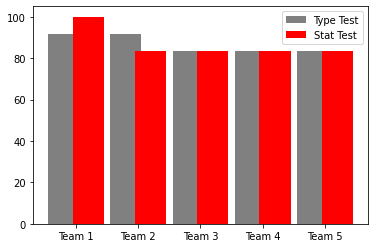

In [38]:
cnt = int(input("Enter the number of teams you would like to create :"))
stest = []
ttest = []
eam = []
flag = cnt
i = cnt + 1
print("-------------------------------------------------- Teams Built For You --------------------------------------------------")
while(cnt > 0):
    team = sel()
    if(Statest(team) > 75.0):
        if(Typetest(team) > 75.0):
            print("\nTeam ",i-cnt," :",team)
            a = "Team " + str((i-cnt))
            eam.append(a)
            stest.append(Statest(team)) 
            ttest.append(Typetest(team))
            print("\n")
            cnt = cnt - 1

x_axis = np.arange(len(eam))

plt.bar(x_axis -0.2, ttest, width=0.5, label = 'Type Test',color=["grey"])
plt.bar(x_axis +0.2, stest, width=0.5, label = 'Stat Test', color =["red"])

plt.xticks(x_axis, eam)

plt.legend()
plt.show()
#Add visualization here using percentage plots --> create df with percentages and plot the chart finally.check medium for help{link on wa}

# Conclusion:

We can summarise the following about this dataset from the visualization we did :
- The diversity of the different types of pokemon is increasing as we go from generation to generation
- The number of water type pokemon have been steadily decreasing from generation 1 to 6
- there are very little legendary and psuedo legendary pokemon when compared to normal pokemon
- Pokemon become stronger when they evolve and also when they mega evolve.

Radar charts where the user can enter the pokemon he/she wants to visualize are also provided along with a team builder that helps create strong teams for the user.


# References:

Dataset downloaded from Kaggle.com

Main References : 

- "A Deep Dive Into Exploratory Data Analysis : Pokemon Dataset" medium.com
- "Complete Pokemon-Stats Visualization" - Ayush Gupta Kaggle.com
- "How to Create Percentage Plots for Visualizing Your Data in Python" medium.com

Others:
- GeeksforGeeks.com
- pythonguides.com
- stackoverflow.com